<a href="https://colab.research.google.com/github/bkleck/WaterAnalytics/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Importing Datasets and Libraries

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Surface Water Hydrology

/content/gdrive/MyDrive/Surface Water Hydrology


In [ ]:
import pandas as pd
from datetime import datetime, date 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2) EDA for Aquifer Petrignano

In [ ]:
# start off with Petriganano as it has the least number of features, easier to clean
df = pd.read_csv('data/Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [ ]:
# rename columns for easier manipulation
df.columns = ['date', 'rainfall', 'depth_p24', 'depth_p25', 'temp_umbra', 'temp_petri', 'volume', 'hydrometry']
df.head()

,date,rainfall,depth_p24,depth_p25,temp_umbra,temp_petri,volume,hydrometry
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


### 2.1. Date-Time Manipulation

In [ ]:
# for time-series analysis, we have to convert our date column into datetime format
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')

# we also sort our dataset in chronological order for further time-series analysis later
df = df.sort_values(by='date')
df.head()

,date,rainfall,depth_p24,depth_p25,temp_umbra,temp_petri,volume,hydrometry
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


### 2.2. Removing Unimportant Features and Data

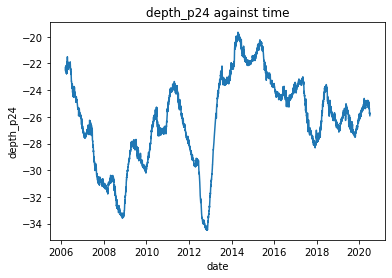

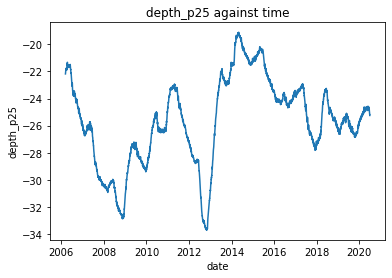

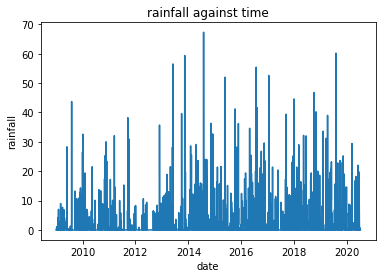

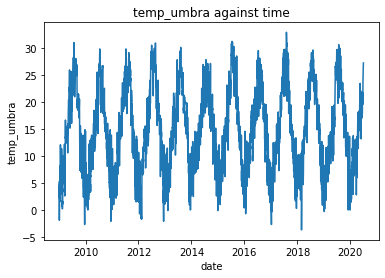

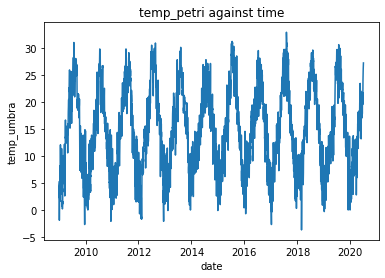

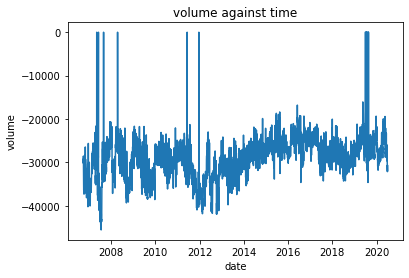

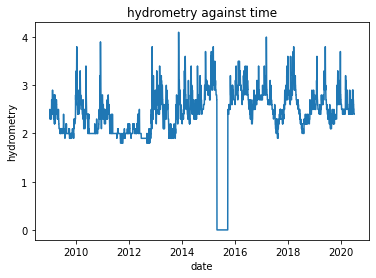

In [ ]:
#depth_p24 against time lineplot
sns.lineplot(x="date",y="depth_p24",data= df)
plt.title('depth_p24 against time')
plt.show()

#depth_p25 against time lineplot
sns.lineplot(x="date",y="depth_p25",data= df)
plt.title('depth_p25 against time')
plt.show()

#rainfall against time lineplot
sns.lineplot(x="date",y="rainfall",data= df)
plt.title('rainfall against time')
plt.show()

#temp_umbra against time lineplot
sns.lineplot(x="date",y="temp_umbra",data= df)
plt.title('temp_umbra against time')
plt.show()

#temp_petri against time lineplot
sns.lineplot(x="date",y="temp_umbra",data= df)
plt.title('temp_petri against time')
plt.show()

#volume against time lineplot
sns.lineplot(x="date",y="volume",data= df)
plt.title('volume against time')
plt.show()

#hydrometry against time lineplot
sns.lineplot(x="date",y="hydrometry",data= df)
plt.title('hydrometry against time')
plt.show()

Based on the plots seen above, we see that the features depth_p24 and depth_p25 have a similar lineplot and values, hence we will drop depth_p24 and use depth_p25 as the target variable.

Similarly, temp_umbra and temp_petri have similar lineplot, hence we will drop temp_umbra and use temp_petri as the feature variable.

Furthermore, as we can see from the depth against time plot and the rainfall against time plot, we have a correlation where a higher rainfall results in a deeper water body.

In [ ]:
df = df.drop(['depth_p24','temp_petri'],axis=1)
df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry
0,2006-03-14,NaN,-22.18,NaN,NaN,NaN
1,2006-03-15,NaN,-22.14,NaN,NaN,NaN
2,2006-03-16,NaN,-22.04,NaN,NaN,NaN
3,2006-03-17,NaN,-22.04,NaN,NaN,NaN
4,2006-03-18,NaN,-22.04,NaN,NaN,NaN


As seen from the plots above, the target variable (Depth to Groundwater) contains data since 2006, but the feature variables mostly only contain data from 2009 onwards, hence we will drop all data before 2009 to remove these NaNs that would affect our model performance negatively.

In [ ]:
# drop rows before 2009 as they contain mostly NaN values
df = df[~(df['date'] < '2009-01-01')]
df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry
1024,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1025,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
1026,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
1027,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
1028,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


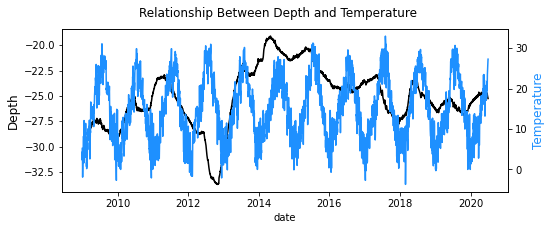

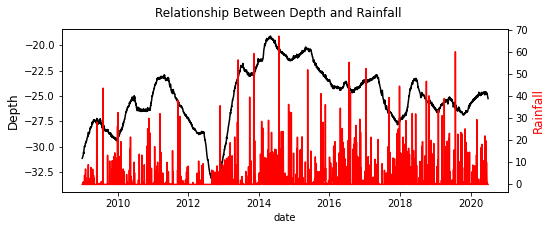

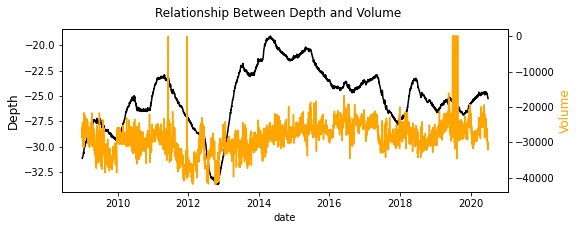

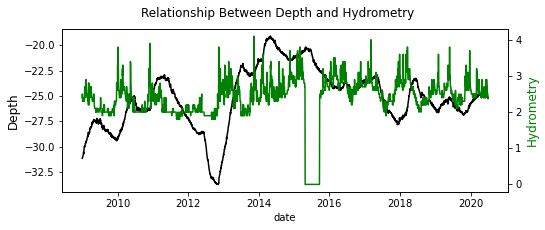

In [ ]:
##Relationship Between Depth and Temperature
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
f.suptitle('Relationship Between Depth and Temperature', fontsize=12)
sns.lineplot(y=df.depth_p25, x=df.date, ax=ax1, color='black')
ax1.set_ylabel('Depth', color='black', fontsize=12) 

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

sns.lineplot(y=df.temp_umbra, x=df.date, ax=ax2, color='dodgerblue')
ax2.set_ylabel('Temperature', color='dodgerblue', fontsize=12) 

plt.show()

##Relationship Between Depth and Rainfall
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
f.suptitle('Relationship Between Depth and Rainfall', fontsize=12)
sns.lineplot(y=df.depth_p25, x=df.date, ax=ax1, color='black')
ax1.set_ylabel('Depth', color='black', fontsize=12) 

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

sns.lineplot(y=df.rainfall, x=df.date, ax=ax2, color='red')
ax2.set_ylabel('Rainfall', color='red', fontsize=12) 

plt.show()

##Relationship Between Depth and Volume
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
f.suptitle('Relationship Between Depth and Volume', fontsize=12)
sns.lineplot(y=df.depth_p25, x=df.date, ax=ax1, color='black')
ax1.set_ylabel('Depth', color='black', fontsize=12) 

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

sns.lineplot(y=df.volume, x=df.date, ax=ax2, color='orange')
ax2.set_ylabel('Volume', color='orange', fontsize=12) 

plt.show()

##Relationship Between Depth and Hydrometry
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
f.suptitle('Relationship Between Depth and Hydrometry', fontsize=12)
sns.lineplot(y=df.depth_p25, x=df.date, ax=ax1, color='black')
ax1.set_ylabel('Depth', color='black', fontsize=12) 

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

sns.lineplot(y=df.hydrometry, x=df.date, ax=ax2, color='green')
ax2.set_ylabel('Hydrometry', color='green', fontsize=12) 

plt.show()


### 2.3. Resampling

Now, we will try out resampling to derive further insights on our dataset. Given that our dataset is in the format of days, it would not make sense to upsample (e.g. into hours) as the frequency would be too high.

Hence, we will downsample into weeks, months, quarters and years to see any underlying trends.

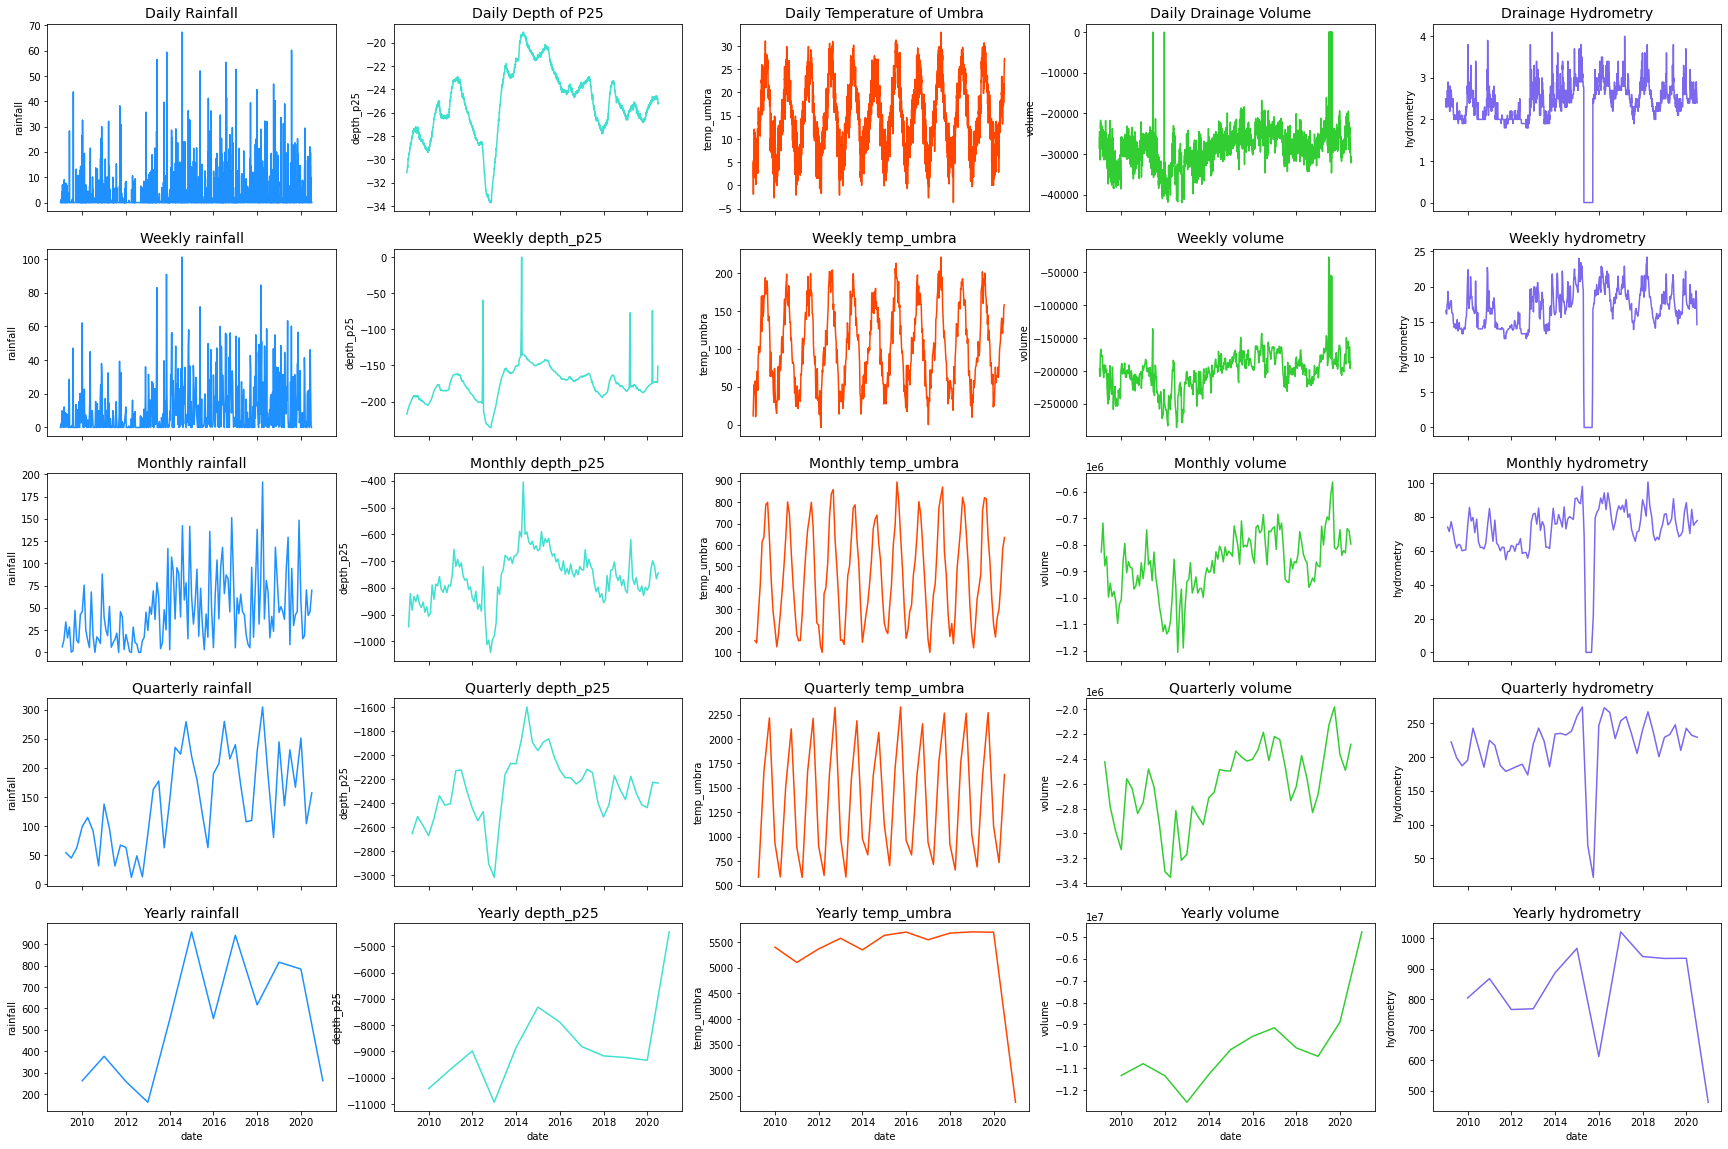

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=5, sharex=True, figsize=(30,20))
columns = ['rainfall', 'depth_p25', 'temp_umbra', 'volume', 'hydrometry']
colors = ['dodgerblue', 'turquoise', 'orangered', 'limegreen', 'mediumslateblue']

sns.lineplot(df['date'], df['rainfall'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Daily Rainfall', fontsize=14)

sns.lineplot(df['date'], df['depth_p25'], color='turquoise', ax=ax[0, 1])
ax[0, 1].set_title('Daily Depth of P25', fontsize=14)

sns.lineplot(df['date'], df['temp_umbra'], color='orangered', ax=ax[0, 2])
ax[0, 2].set_title('Daily Temperature of Umbra', fontsize=14)

sns.lineplot(df['date'], df['volume'], color='limegreen', ax=ax[0, 3])
ax[0, 3].set_title('Daily Drainage Volume', fontsize=14)

sns.lineplot(df['date'], df['hydrometry'], color='mediumslateblue', ax=ax[0, 4])
ax[0, 4].set_title('Drainage Hydrometry', fontsize=14)

# resample for a week
resampled_df = df.resample('7D', on='date').sum().reset_index(drop=False)

# plot for weekly columns
for column in columns:
  idx = columns.index(column)
  sns.lineplot(resampled_df['date'], resampled_df[column], color=colors[idx], ax=ax[1, idx])
  ax[1, idx].set_title(f'Weekly {column}', fontsize=14)


# resample for a month
resampled_df = df.resample('M', on='date').sum().reset_index(drop=False)

# plot for monthly columns
for column in columns:
  idx = columns.index(column)
  sns.lineplot(resampled_df['date'], resampled_df[column], color=colors[idx], ax=ax[2, idx])
  ax[2, idx].set_title(f'Monthly {column}', fontsize=14)


# resample for a quarter
resampled_df = df.resample('Q', on='date').sum().reset_index(drop=False)

# plot for quarterly columns
for column in columns:
  idx = columns.index(column)
  sns.lineplot(resampled_df['date'], resampled_df[column], color=colors[idx], ax=ax[3, idx])
  ax[3, idx].set_title(f'Quarterly {column}', fontsize=14)


# resample for a year
resampled_df = df.resample('A', on='date').sum().reset_index(drop=False)

# plot for yearly columns
for column in columns:
  idx = columns.index(column)
  sns.lineplot(resampled_df['date'], resampled_df[column], color=colors[idx], ax=ax[4, idx])
  ax[4, idx].set_title(f'Yearly {column}', fontsize=14)

As seen from the above plots, the trends are pretty similar for the daily, weekly and monthly plots. The quarterly and yearly plots show the trends as a big picture. In order to not reduce too much data (which is required for us to train our model), we will stick to either the daily or weekly dataset.

# 3) Data Cleaning

### 3.1. Equidistant Data

For time-series data, they have to be equidistant in order for proper analysis to be done. Hence, we will take check the difference between each row of data.

In [ ]:
# take the difference by a shift of 1
df['shift'] = df['date'] - df['date'].shift(1)
df[['date', 'shift']].head()

,date,shift
1024,2009-01-01,NaT
1025,2009-01-02,1 days
1026,2009-01-03,1 days
1027,2009-01-04,1 days
1028,2009-01-05,1 days


In [ ]:
df['shift'].sum(), df['shift'].count()

(Timedelta('4198 days 00:00:00'), 4198)

Since the sum equates to the count, it means that each row differs by 1 day, hence it is an equidistant time series data, and no further processing is required.

In [ ]:
df.drop('shift', axis=1, inplace=True)
df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry
1024,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1025,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
1026,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
1027,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
1028,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


### 3.2. Handling NaNs and Zeros 

Now, we will try to deal with the NaNs and 0s left in our dataset. We have to find ways to replace their values, or else the machine learning models would not be able to interpret them correctly, affecting our results.

In [ ]:
df.isna().sum()

date           0
rainfall       0
depth_p25     27
temp_umbra     0
volume         1
hydrometry     0
dtype: int64

In [ ]:
(df == 0).astype(int).sum(axis=0)

date             0
rainfall      3147
depth_p25        0
temp_umbra       7
volume          25
hydrometry     150
dtype: int64

From the sums above, as well as the individual line plots during our EDA, we can tell that there are many 0s in volume and hydrometry that look like errors in the data, hence we will convert them into NaNs instead for further processing.

Text(0, 0.5, 'Volume')

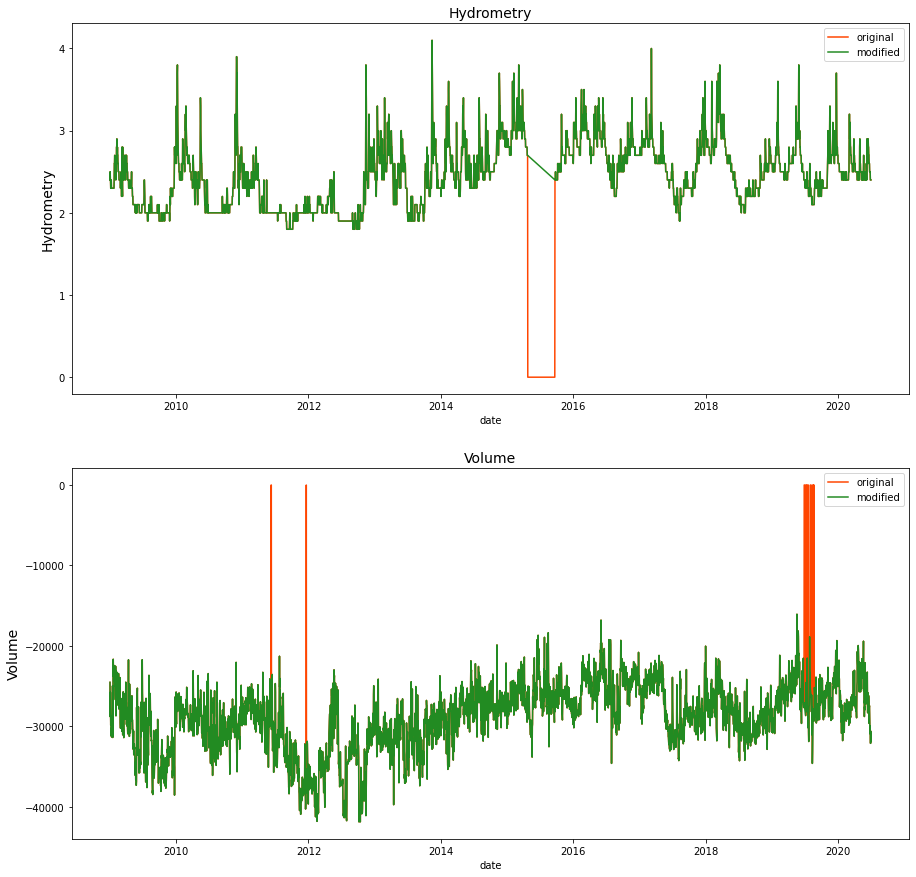

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df['hydrometry'].copy()
df['hydrometry'] = df['hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='orangered', label='original')
sns.lineplot(x=df['date'], y=df['hydrometry'].fillna(np.inf), ax=ax[0], color='forestgreen', label='modified')
ax[0].set_title('Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

old_drainage = df['volume'].copy()
df['volume'] = df['volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='orangered', label='original')
sns.lineplot(x=df['date'], y=df['volume'].fillna(np.inf), ax=ax[1], color='forestgreen', label='modified')
ax[1].set_title('Volume', fontsize=14)
ax[1].set_ylabel(ylabel='Volume', fontsize=14)

Now, we have a few options on how we can fill up the Nan values we have created, or already existed.

1) Fill NaN with mean value

2) Fill NaN with previous value (using forward fill)

3) Fill NaN through linear interpolation

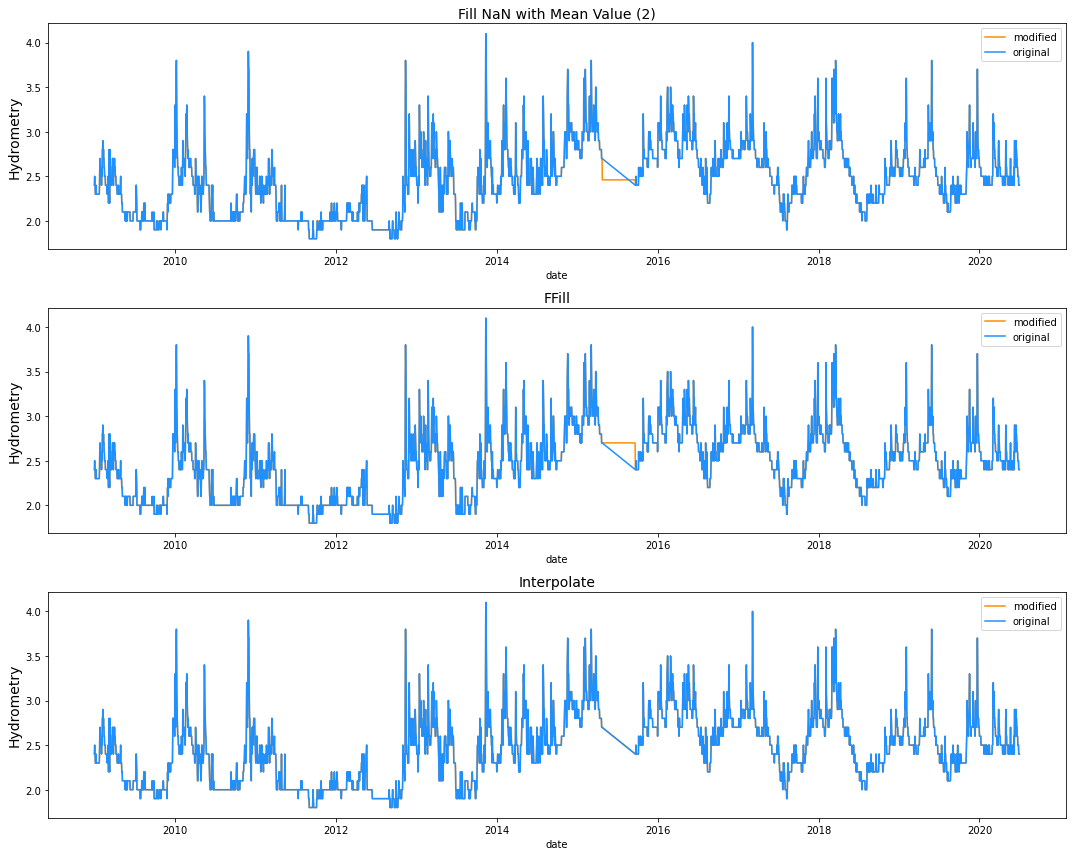

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

mean_hydrometry = df['hydrometry'].mean()
sns.lineplot(x=df['date'], y=df['hydrometry'].fillna(mean_hydrometry), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title(f'Fill NaN with Mean Value ({mean_hydrometry:.0f})', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df['date'], y=df['hydrometry'].ffill(), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['hydrometry'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'FFill', fontsize=14)
ax[1].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df['date'], y=df['hydrometry'].interpolate(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['hydrometry'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'Interpolate', fontsize=14)
ax[2].set_ylabel(ylabel='Hydrometry', fontsize=14)

plt.tight_layout()
plt.show()

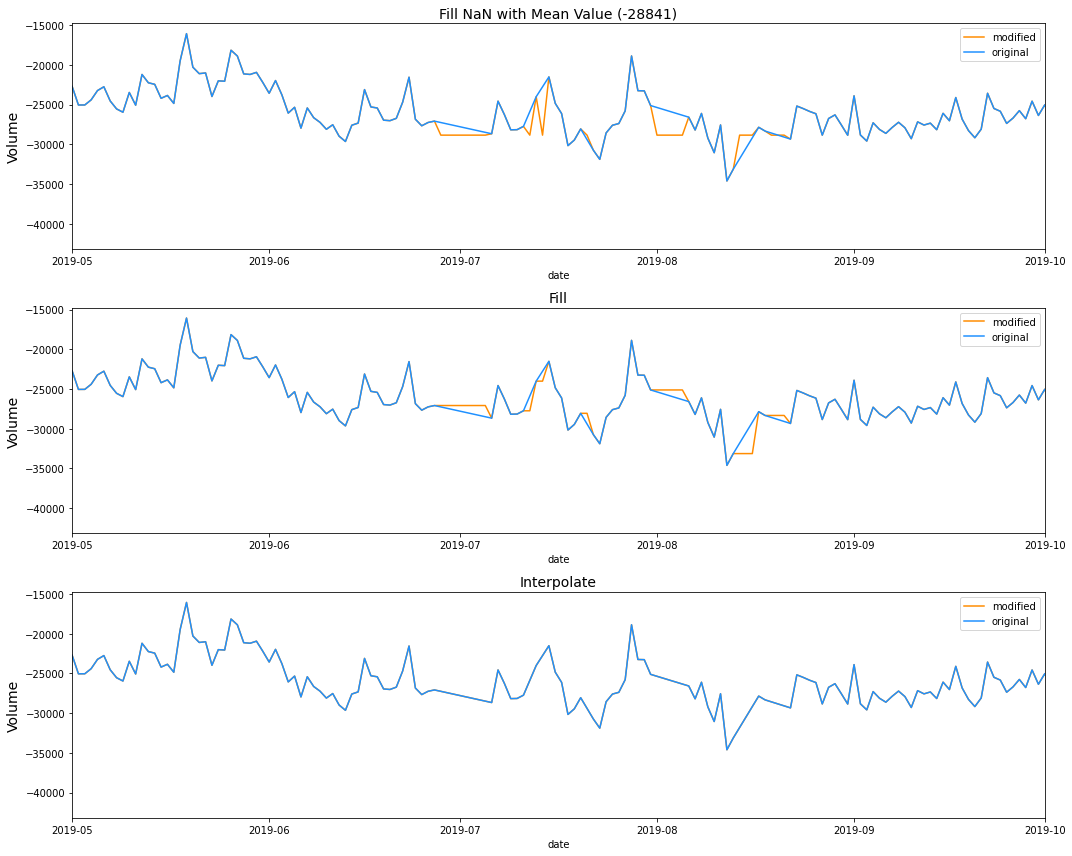

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

mean_drainage = df['volume'].mean()
sns.lineplot(x=df['date'], y=df['volume'].fillna(mean_drainage), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[0].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df['date'], y=df['volume'].ffill(), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill', fontsize=14)
ax[1].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df['date'], y=df['volume'].interpolate(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'Interpolate', fontsize=14)
ax[2].set_ylabel(ylabel='Volume', fontsize=14)

for i in range(3):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])

plt.tight_layout()
plt.show()

As seen from the above plots, interpolating would give the most accurate depiction of how the time-series would look like, hence we will interpolate our NaN values.

In [ ]:
df['volume'] = df['volume'].interpolate()
df['hydrometry'] = df['hydrometry'].interpolate()
df['depth_p25'] = df['depth_p25'].interpolate()
df.isna().sum()

date          0
rainfall      0
depth_p25     0
temp_umbra    0
volume        0
hydrometry    0
dtype: int64

In [ ]:
df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry
1024,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1025,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
1026,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
1027,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
1028,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


# 4) Stationarity

Many time-series model depend on the assumption that the data being used is stationary. Data that is stationary should have **constant mean, variance and covariance**, and that they are **not time-dependent**.

What this means is that if the data is stationary over a certain time interval, we can expect the same behaviour over another time interval.

In [ ]:
df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry
1024,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1025,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
1026,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
1027,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
1028,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


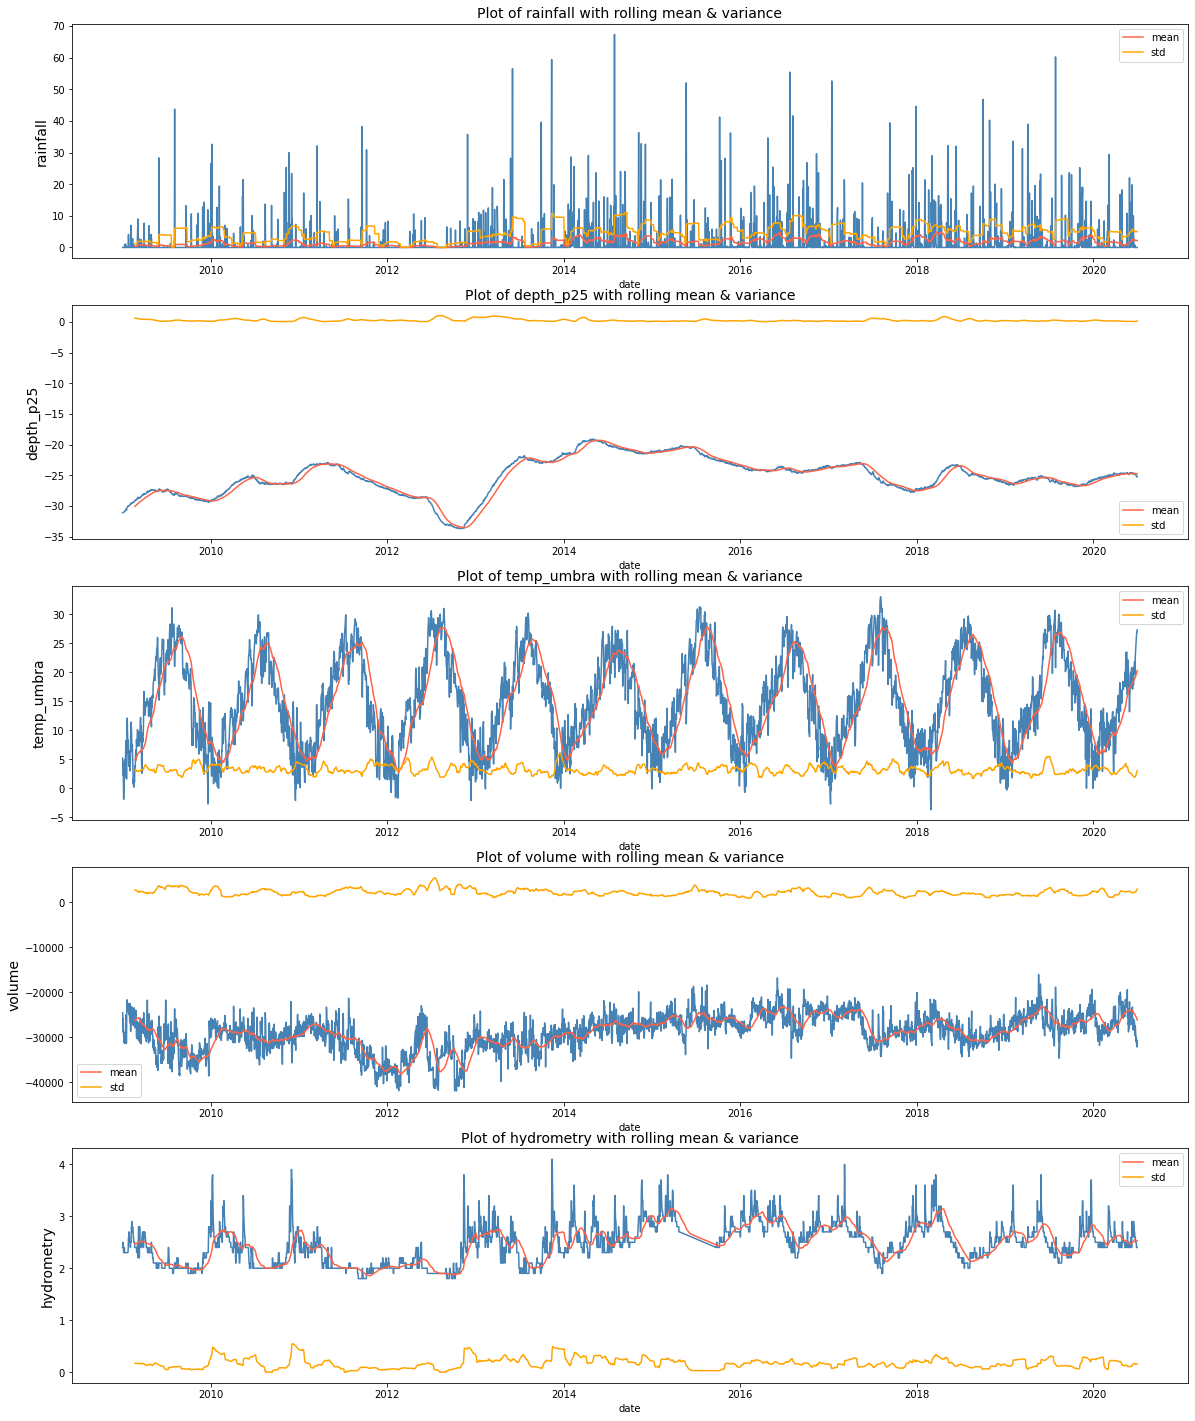

In [ ]:
rolling_window = 52
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(20,25))
columns = ['rainfall', 'depth_p25', 'temp_umbra', 'volume', 'hydrometry']

for column in columns:
  idx = columns.index(column)
  sns.lineplot(x=df['date'], y=df[column], ax=ax[idx], color='steelblue')
  sns.lineplot(x=df['date'], y=df[column].rolling(rolling_window).mean(), ax=ax[idx], color='tomato', label='mean')
  sns.lineplot(x=df['date'], y=df[column].rolling(rolling_window).std(), ax=ax[idx], color='orange', label='std')
  ax[idx].set_title(f'Plot of {column} with rolling mean & variance', fontsize=14)
  ax[idx].set_ylabel(ylabel=column, fontsize=14)

As seen from the plots, **none of the variables have constant mean and variance**. Hence, none of these variables are stationary. Next, we will perform more analysis by checking more statistics by splitting into partitions.

In [ ]:
num_partitions = 3
partition_length = int(len(df) / num_partitions)
print(f'Length of each sub-dataframe: {partition_length}')

df1 = df[0:1399]
df2 = df[1399:2798]
df3 = df[2798:-1]

Length of each sub-dataframe: 1399


In [ ]:
mean1 = df1.mean()
var1 = df1.var()

mean2 = df2.mean()
var2 = df2.var()

mean3 = df3.mean()
var3 = df3.var()

stat_list = [mean1, mean2, mean3, var1, var2, var3]
stat_df = pd.concat(stat_list, axis=1)
stat_df.columns = ['Partition 1 Mean', 'Partition 2 Mean', 'Partition 3 Mean', 'Partition 1 Variance', 'Partition 2 Variance', 'Partition 3 Variance']
stat_df

,Partition 1 Mean,Partition 2 Mean,Partition 3 Mean,Partition 1 Variance,Partition 2 Variance,Partition 3 Variance
rainfall,0.705289,1.977841,1.987571,1.132572e+01,3.712909e+01,3.218965e+01
depth_p25,-27.311476,-22.917570,-25.304796,6.092892e+00,8.903484e+00,1.506318e+00
temp_umbra,14.968263,15.105218,15.008643,6.547281e+01,5.671376e+01,6.010668e+01
volume,-31520.527977,-27970.642550,-27015.077726,1.705849e+07,1.123103e+07,8.467363e+06
hydrometry,2.176555,2.640815,2.573429,8.943562e-02,1.149747e-01,8.692748e-02


As seen from the partition dataframe above, over 3 partitions, only **temp_umbra and depth_p25** has somewhat **constant mean**. I would say **temp_umbra** has somewhat **constant variance**. Hence, only temperature is stationary in this context, but this test fails to account for the seasonality that occurs in temperature.

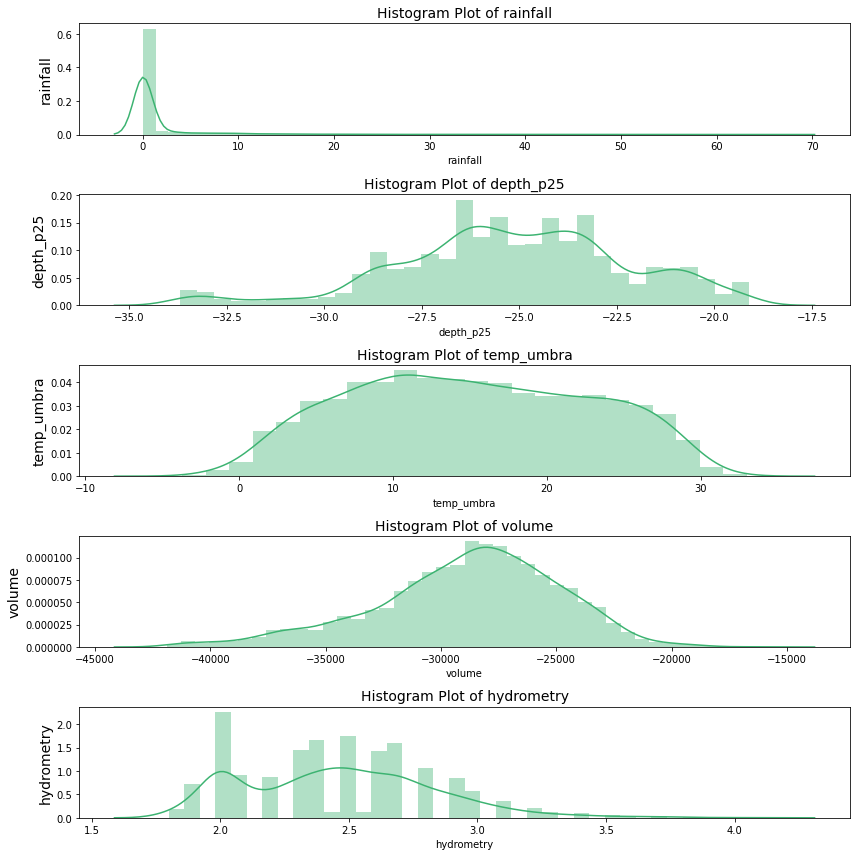

In [ ]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 12))
columns = ['rainfall', 'depth_p25', 'temp_umbra', 'volume', 'hydrometry']

for column in columns:
  idx = columns.index(column)
  sns.distplot(df[column], ax=ax[idx], color='mediumseagreen')
  ax[idx].set_title(f'Histogram Plot of {column}', fontsize=14)
  ax[idx].set_ylabel(ylabel=column, fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
df.head()
columns = df.columns
print(columns)

Index(['date', 'rainfall', 'depth_p25', 'temp_umbra', 'volume', 'hydrometry'], dtype='object')


For a feature to have constant mean and variance, the histogram plot should conform to a Gaussian distribution. Hence, **only volume** is stationary by this check.

The last check, which is the most important, is the **Augmented Dickey-Fuller (ADF) Test**, which checks for unit roots which are a cause of non-stationarity.

- A **Null Hypothesis (H0)** proves that the time series has a unit root, hence its not stationary.
- An **Alternate Hypothesis (H1)** proves time series has no unit root, hence its stationary.

2 ways to reject H0:
- **p-value <= significance level** (default is 0.05)
- **ADF statistic < critical value**


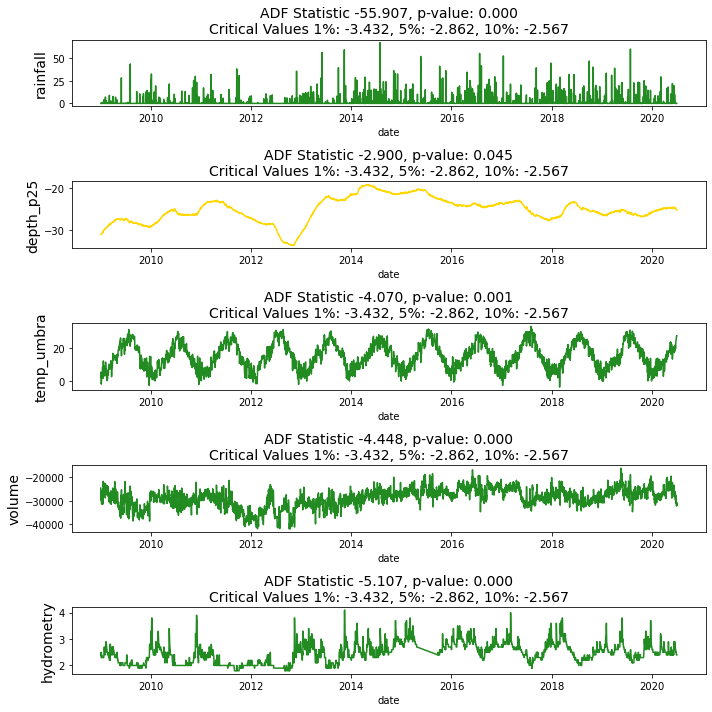

In [ ]:
from statsmodels.tsa.stattools import adfuller

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 10))

def visualize_adf(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val <= significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val <= significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val <= significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

columns = ['rainfall', 'depth_p25', 'temp_umbra', 'volume', 'hydrometry']
for column in columns:
  idx = columns.index(column)
  visualize_adf(df[column].values, column, ax[idx])

plt.tight_layout()
plt.show()

From the ADF tests, most of the features in the time-series are stationary, but depth_p25 is pretty close to being not. Hence, we will make use of either **Transformation or Differencing** to achieve stationarity for it.

In [ ]:
df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry
1024,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1025,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
1026,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
1027,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
1028,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


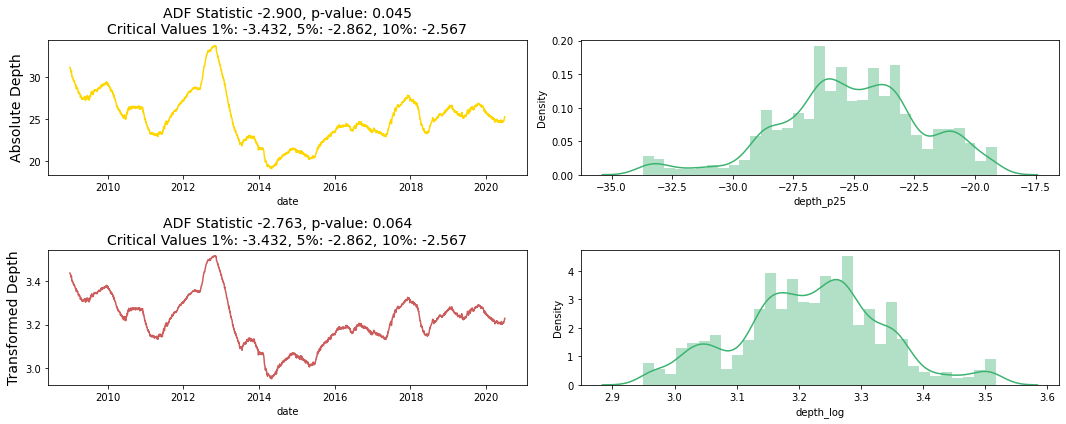

In [ ]:
# transformation
df['depth_log'] = np.log(abs(df['depth_p25']))

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
visualize_adf(abs(df['depth_p25']), 'Absolute Depth', ax[0, 0])
sns.distplot(df['depth_p25'], ax=ax[0, 1], color='mediumseagreen')

visualize_adf(df['depth_log'], 'Transformed Depth', ax[1, 0])
sns.distplot(df['depth_log'], ax=ax[1, 1], color='mediumseagreen')

plt.tight_layout()
plt.show()

From the plot, **Transforming actually made the p-value worse off**, hence we will try Differencing instead. 

We will do both first-order and second-order differencing.

In [ ]:
# First Order Differencing
ts_diff = np.diff(df['depth_p25'])
df['depth_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff_2 = np.diff(df['depth_diff_1'])
df['depth_diff_2'] = np.append([0], ts_diff_2)

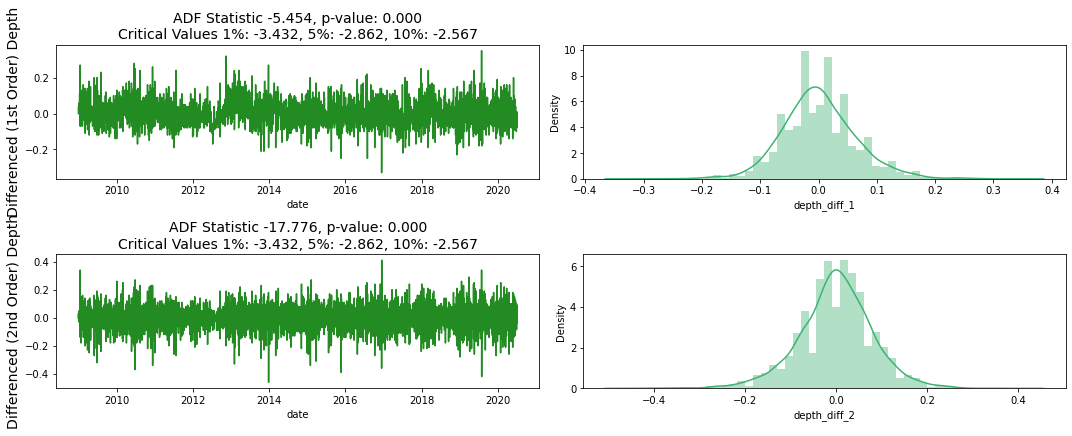

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

visualize_adf(df['depth_diff_1'], 'Differenced (1st Order) Depth', ax[0,0])
sns.distplot(df['depth_diff_1'], ax=ax[0, 1], color='mediumseagreen')

visualize_adf(df['depth_diff_2'], 'Differenced (2nd Order) Depth', ax[1,0])
sns.distplot(df['depth_diff_2'], ax=ax[1, 1], color='mediumseagreen')

plt.tight_layout()
plt.show()

**Differencing actually made the p-value much better**, and since there is no improvement from first-order to second-order, we will **use the first-order depth** column if there is a need for stationarity for the particular machine learning model.

In [ ]:
df.drop(columns=['depth_log', 'depth_diff_2'], inplace=True)
df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry,depth_diff_1
1024,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4,0.00
1025,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5,0.03
1026,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4,0.04
1027,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4,0.02
1028,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3,0.04


# 5) Feature Engineering

Our date-time features are actually **cyclical in nature**, and using the raw date-time may confuse the models. For example, there are 52 weeks in a year, and if we compare the 52nd week with the 1st week, the model may think they are very far apart, but they are actually right next to each other. Hence, we will encode some features such as month, day of the week, week of the year, and season using cosine and sine.

In [ ]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day_of_week'] = pd.DatetimeIndex(df['date']).dayofweek
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['season'] = df['month'] % 12 // 3 + 1

df[['month','day_of_week', 'week_of_year','season']].head()

,month,day_of_week,week_of_year,season
1024,1,3,1,1
1025,1,4,1,1
1026,1,5,1,1
1027,1,6,1,1
1028,1,0,2,1


In [ ]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

day_in_week = 7
df['day_sin'] = np.sin(2*np.pi*df['day_of_week']/day_in_week)
df['day_cos'] = np.cos(2*np.pi*df['day_of_week']/day_in_week)

week_in_year = 52.1429
df['week_sin'] = np.sin(2*np.pi*df['week_of_year']/week_in_year)
df['week_cos'] = np.cos(2*np.pi*df['week_of_year']/week_in_year)

season_in_year = 4
df['season_sin'] = np.sin(2*np.pi*df['season']/season_in_year)
df['season_cos'] = np.cos(2*np.pi*df['season']/season_in_year)

df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry,depth_diff_1,month,day_of_week,week_of_year,season,month_sin,month_cos,day_sin,day_cos,week_sin,week_cos,season_sin,season_cos
1024,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4,0.00,1,3,1,1,0.5,0.866025,0.433884,-0.900969,0.120208,0.992749,1.0,6.123234e-17
1025,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5,0.03,1,4,1,1,0.5,0.866025,-0.433884,-0.900969,0.120208,0.992749,1.0,6.123234e-17
1026,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4,0.04,1,5,1,1,0.5,0.866025,-0.974928,-0.222521,0.120208,0.992749,1.0,6.123234e-17
1027,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4,0.02,1,6,1,1,0.5,0.866025,-0.781831,0.623490,0.120208,0.992749,1.0,6.123234e-17
1028,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3,0.04,1,0,2,1,0.5,0.866025,0.000000,1.000000,0.238673,0.971100,1.0,6.123234e-17


In [ ]:
df.to_csv('data/Aquifer_Petrignano_cleaned.csv')